In [1]:
from pylab import *
from matplotlib import animation,rc
#from IPython.display import HTML

In [2]:
x , y = linspace(-1,1,100) , linspace(-1,1,100)
XX,YY = meshgrid(x,y)
sol = load('sol_EcCalor2D_D0-1_Atz_t1.npy')
sol.shape

(100, 100, 200)

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

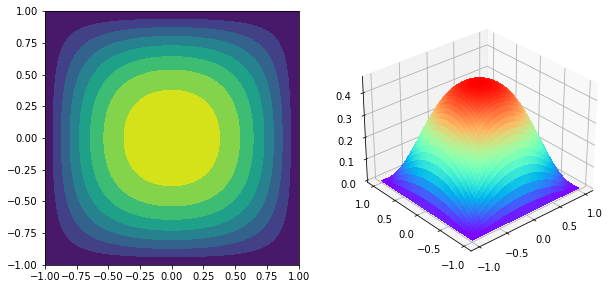

In [3]:
fig = figure(figsize=(10, 5))
ejes1 = fig.add_subplot(1, 2, 1)
ejes1.set_xlim((-1,1)),ejes1.set_ylim((-1,1)),ejes1.set_aspect('equal')
ejes1.contourf(XX,YY,sol[:,:,0])
#
ejes2 = fig.add_subplot(1,2,2,projection='3d')
ejes2.set_xlim((-1,1)),ejes2.set_ylim((-1,1)),ejes2.set_zlim((0,1))

ejes2.plot_surface(XX, YY, sol[:,:,0],linewidth=0, antialiased=False,cmap=cm.rainbow)

ejes2.view_init(30, 45)

def anima(i,ejes1,ejes2,fig):
    ejes2.cla()
    grafica = (ejes1.contourf(XX,YY,sol[:,:,i]),
               ejes2.plot_surface(XX, YY, sol[:,:,i],linewidth=0, antialiased=False,cmap=cm.rainbow))
    ejes2.view_init(30, 30+i)
    return grafica

pelicula = animation.FuncAnimation(fig,anima,frames=sol.shape[2],fargs=(ejes1,ejes2,fig),interval=150)
pelicula.save('calor_2D.mp4')